In [8]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from auxPlots import getInfo, getLHEevents, getDistributions, selectColor

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [58]:
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/*/*/*.npz'))
data = []

for f in files:
    data.append(np.load(f, allow_pickle = True))

data = sorted(data, key=lambda d: d['mass_params'][0])
print(data[5]['process'], data[5]['model'])

$q q \to t \bar{t}$ EFT


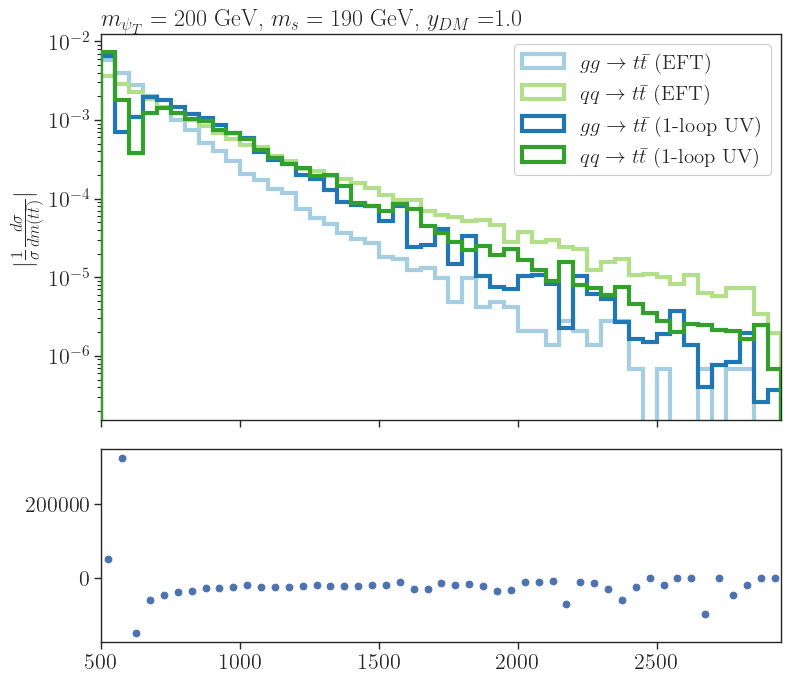

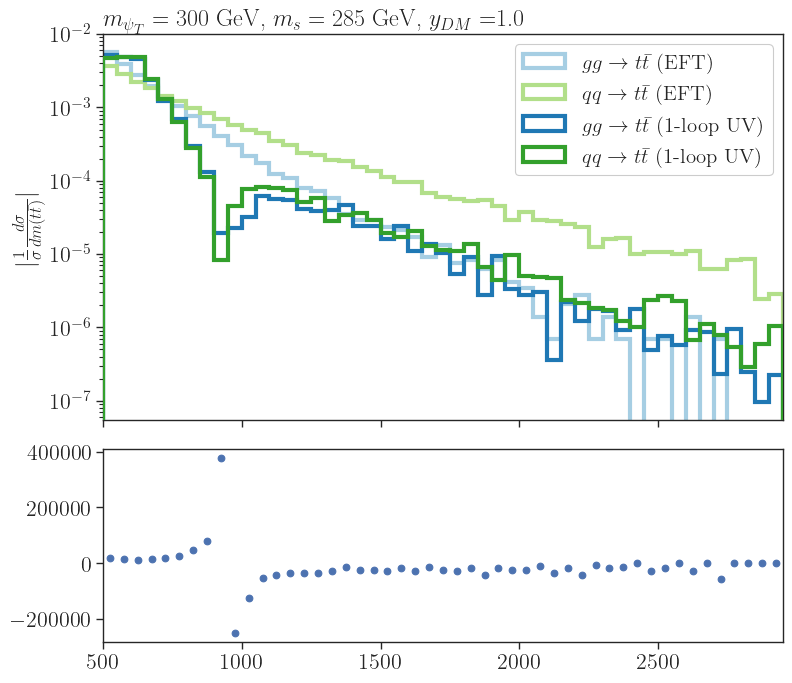

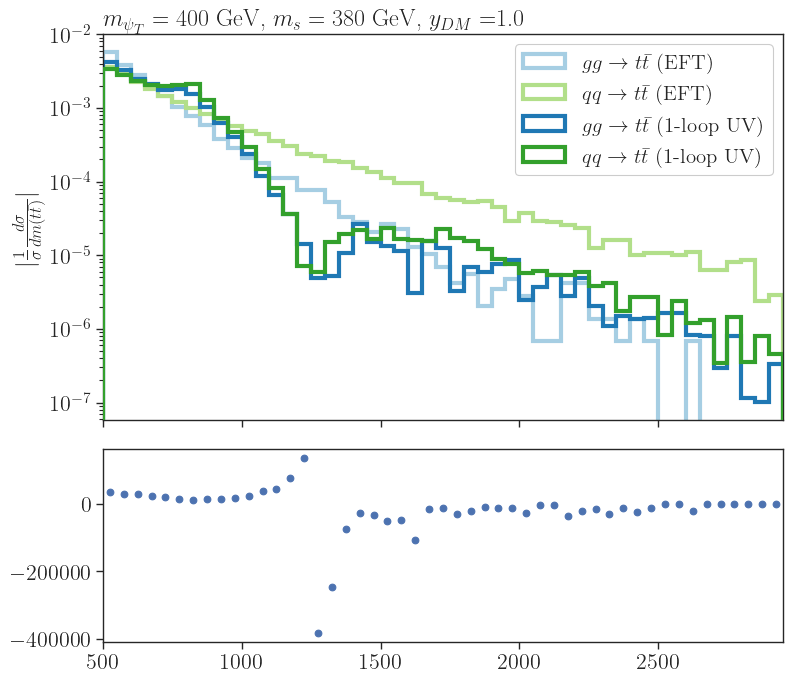

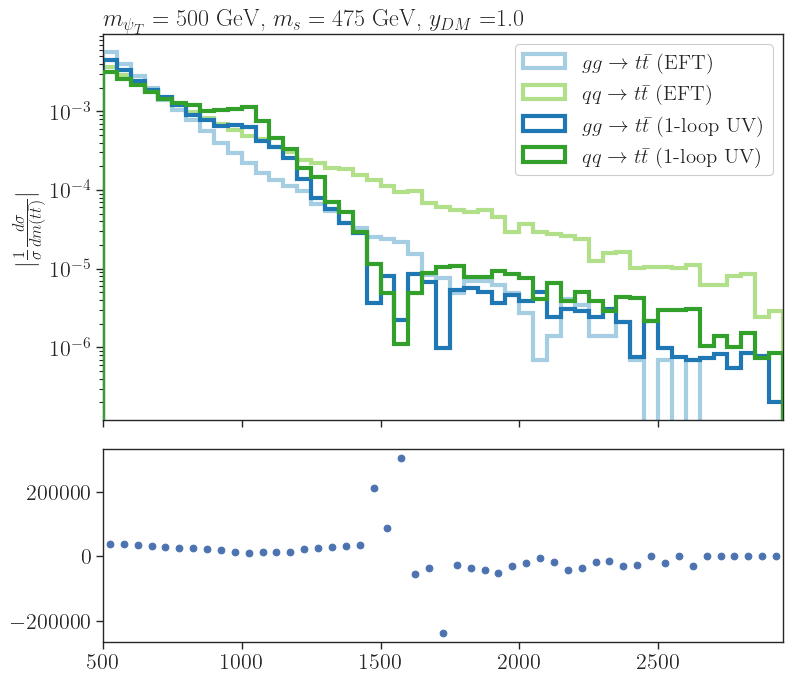

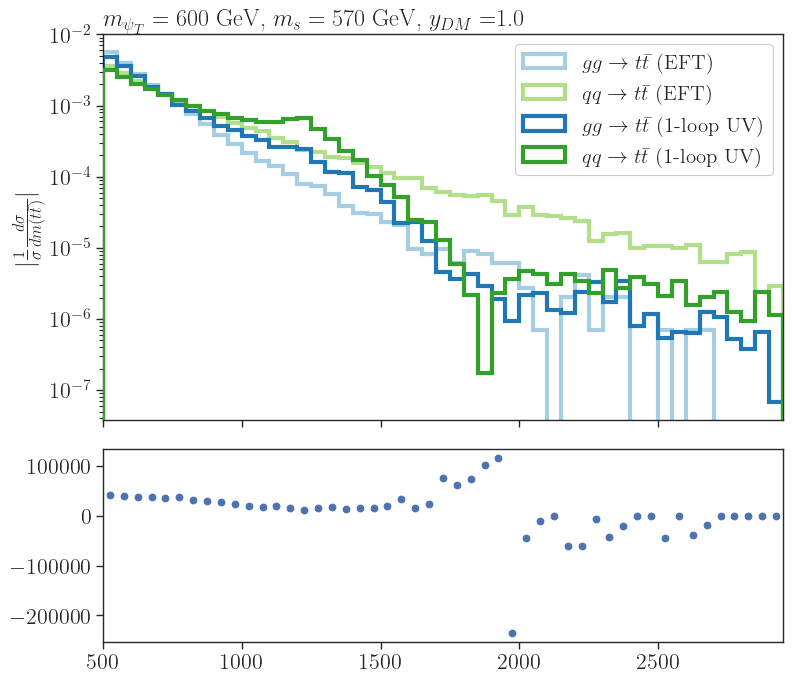

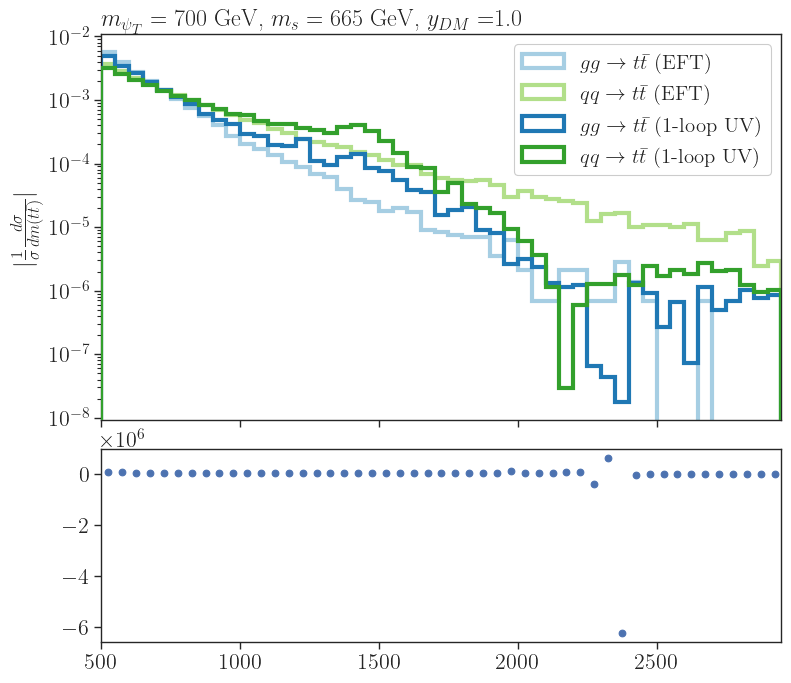

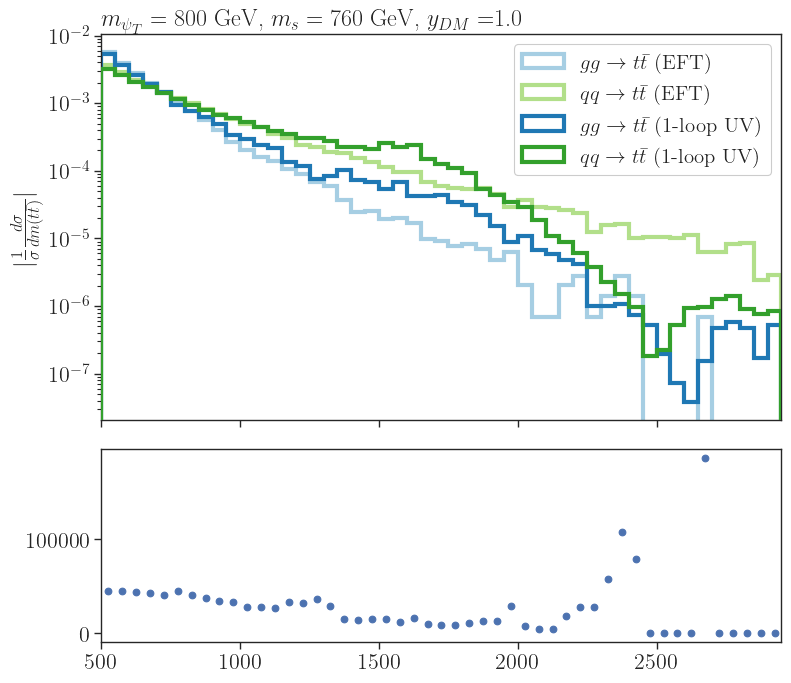

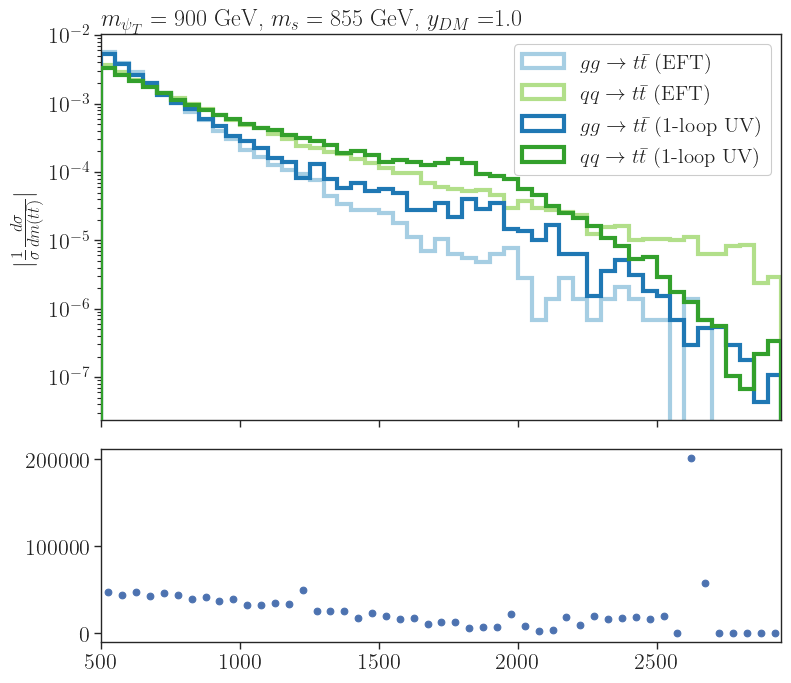

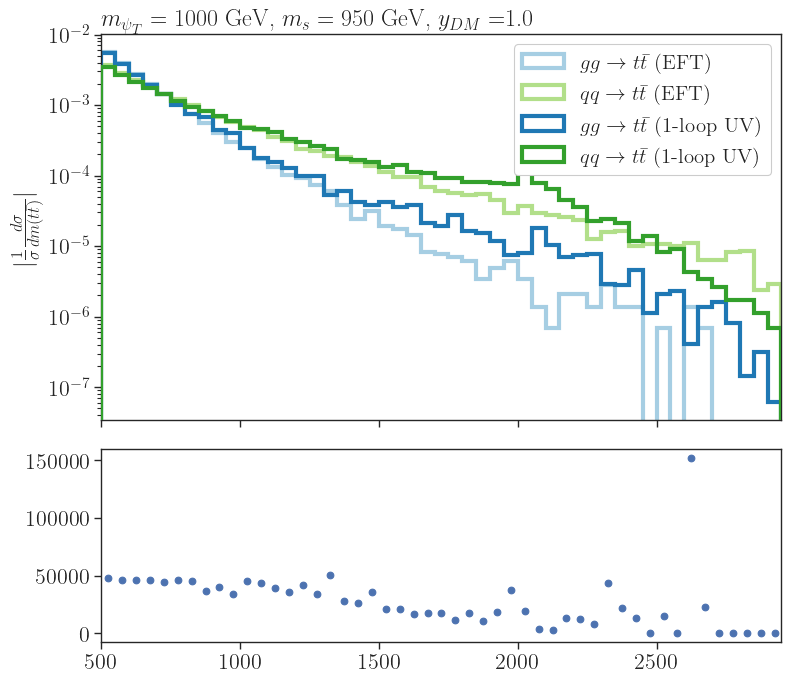

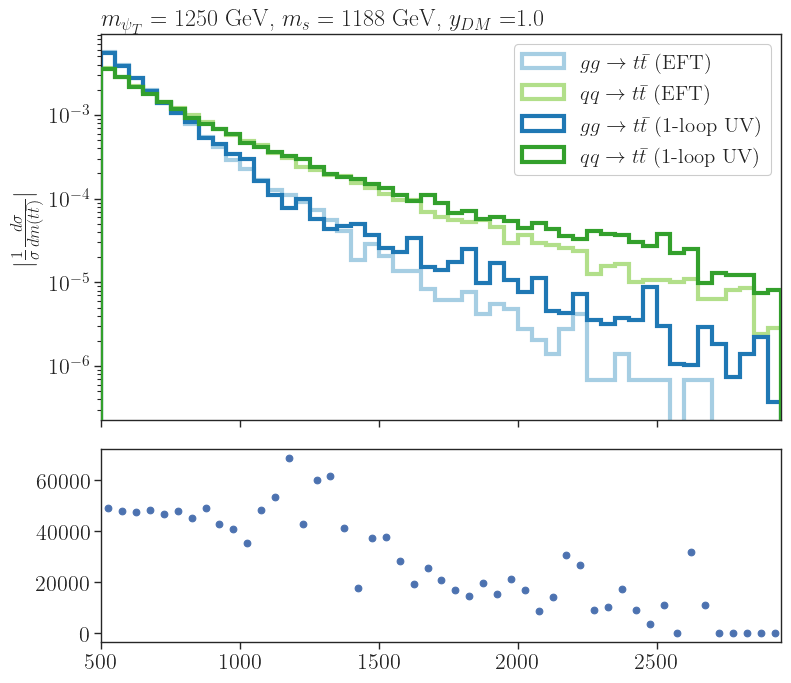

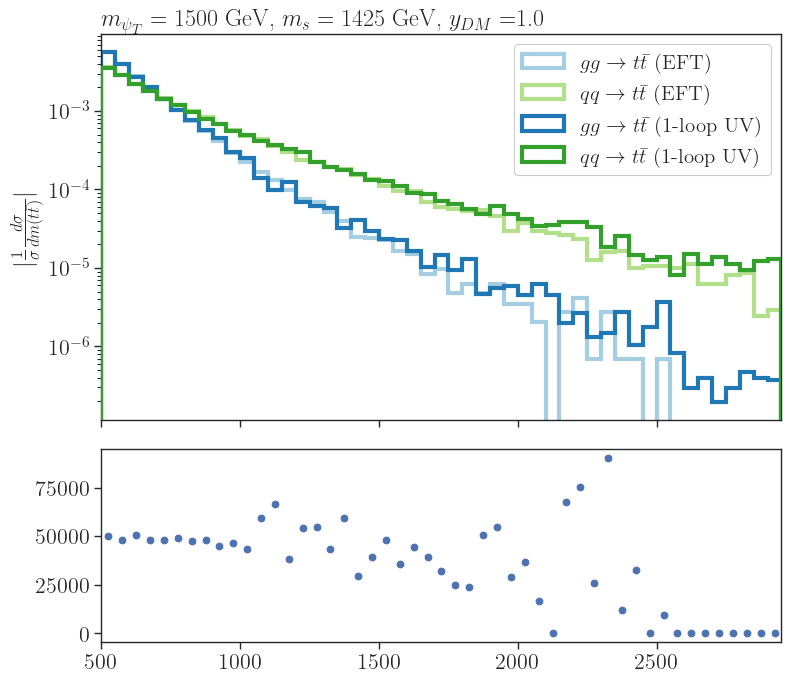

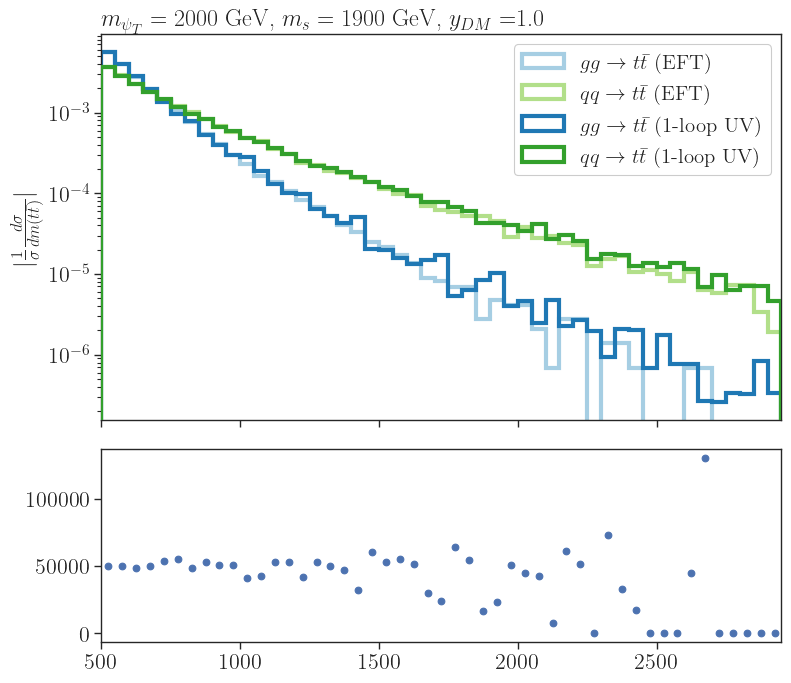

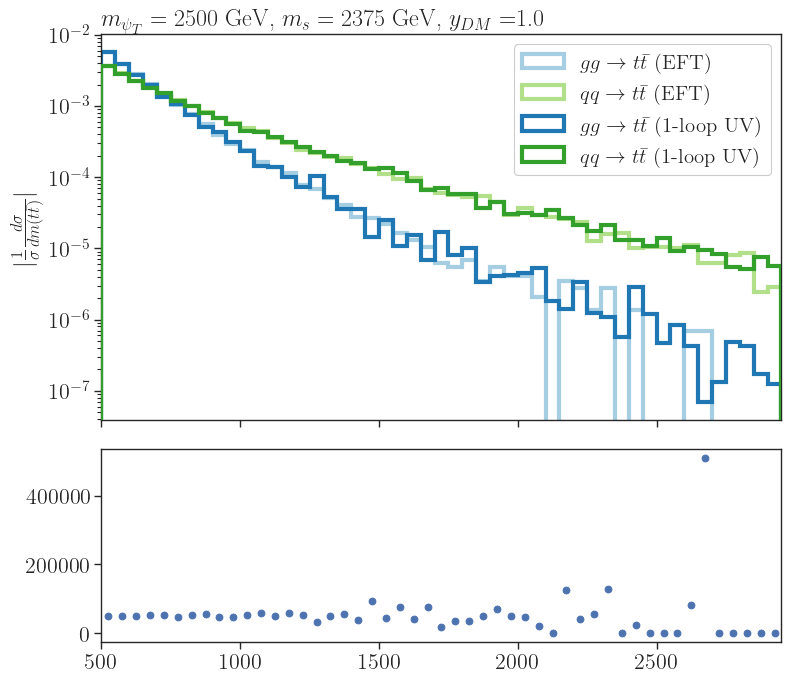

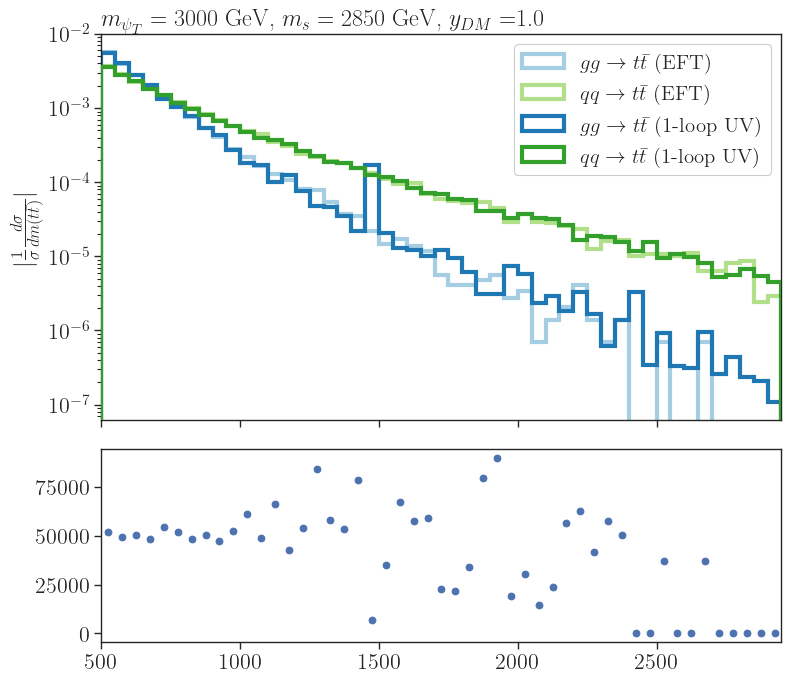

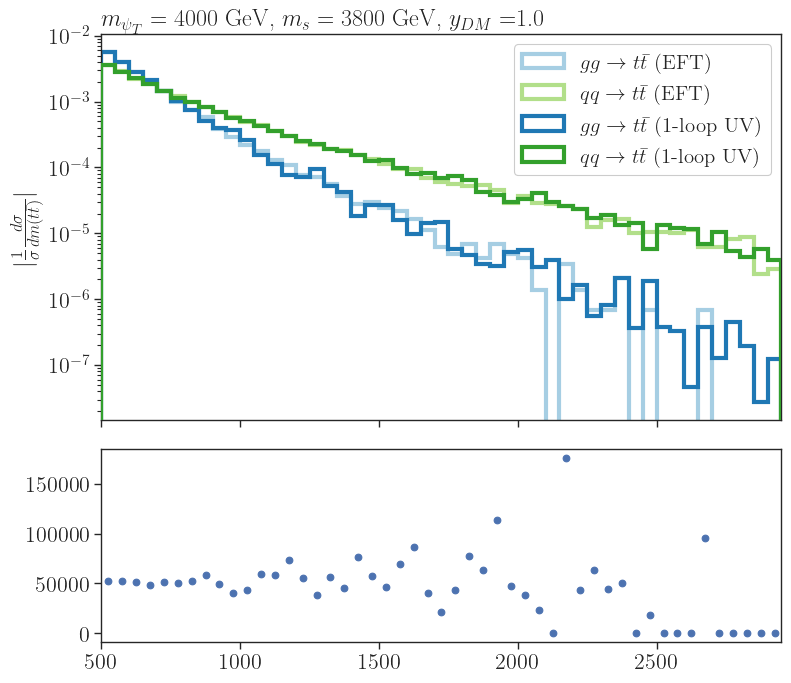

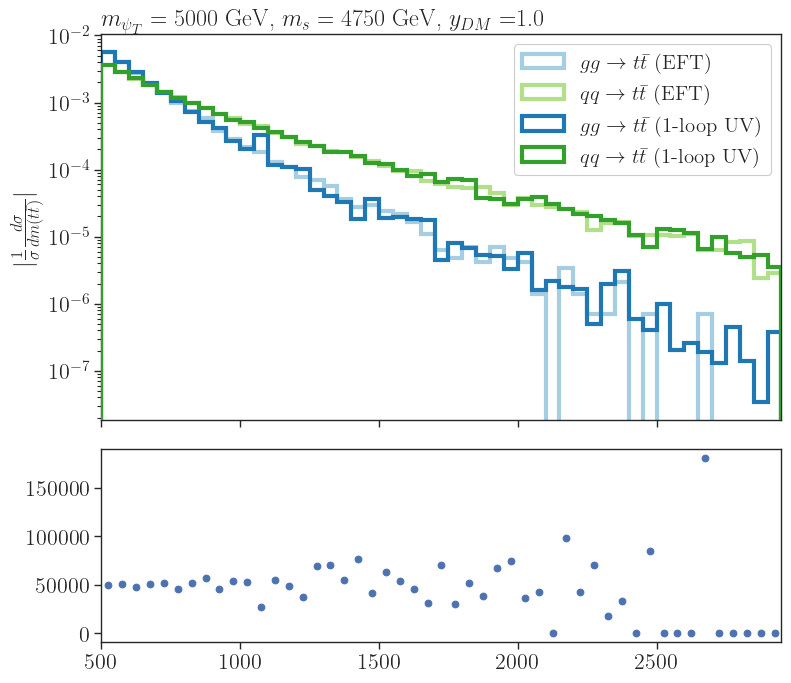

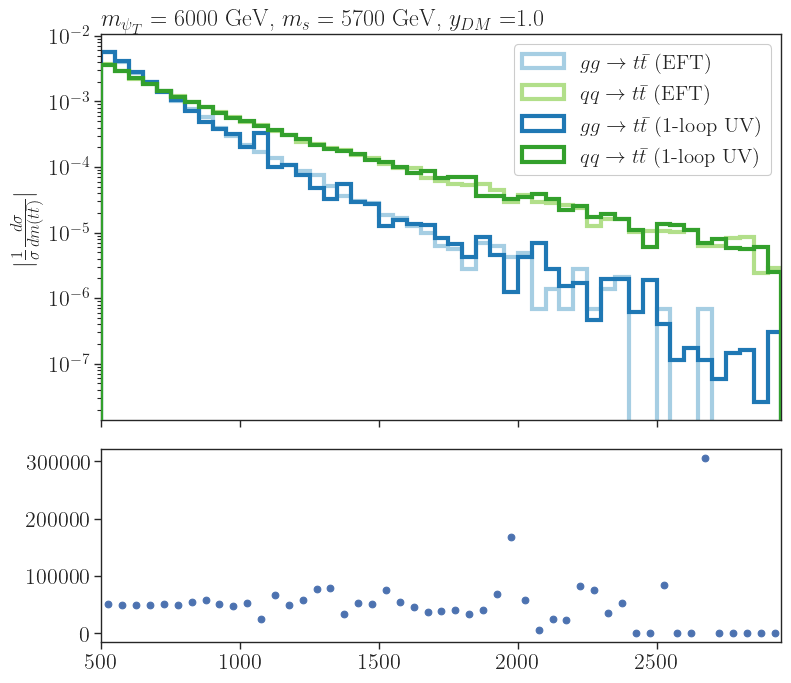

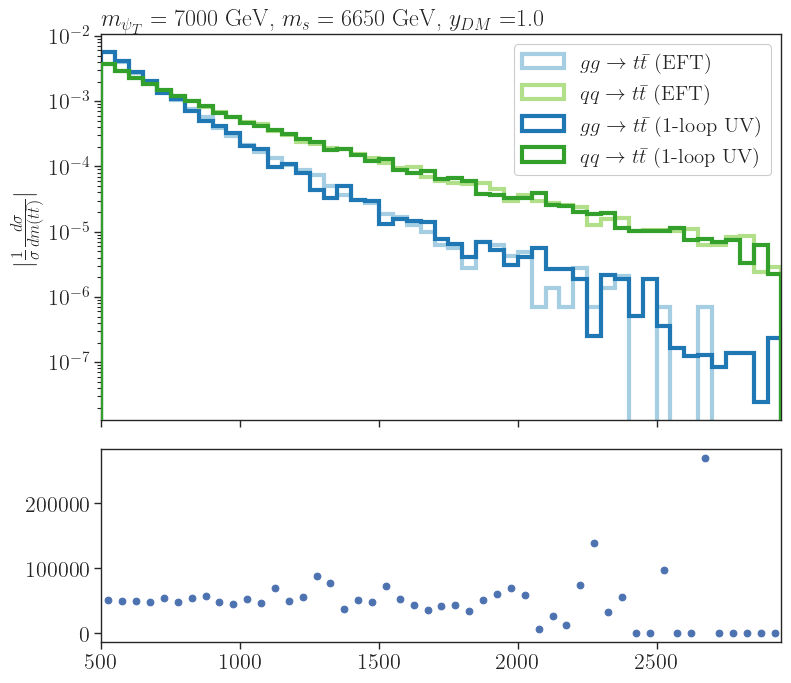

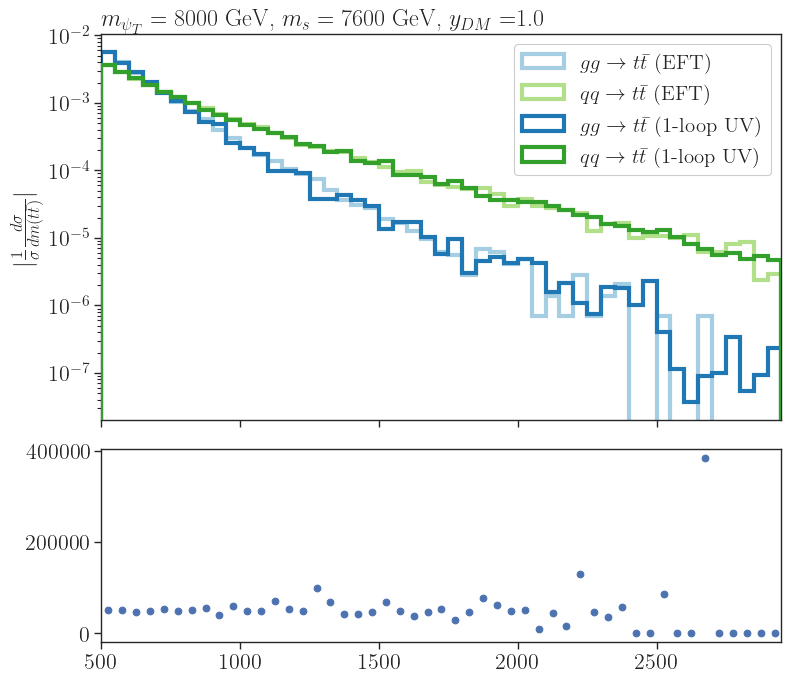

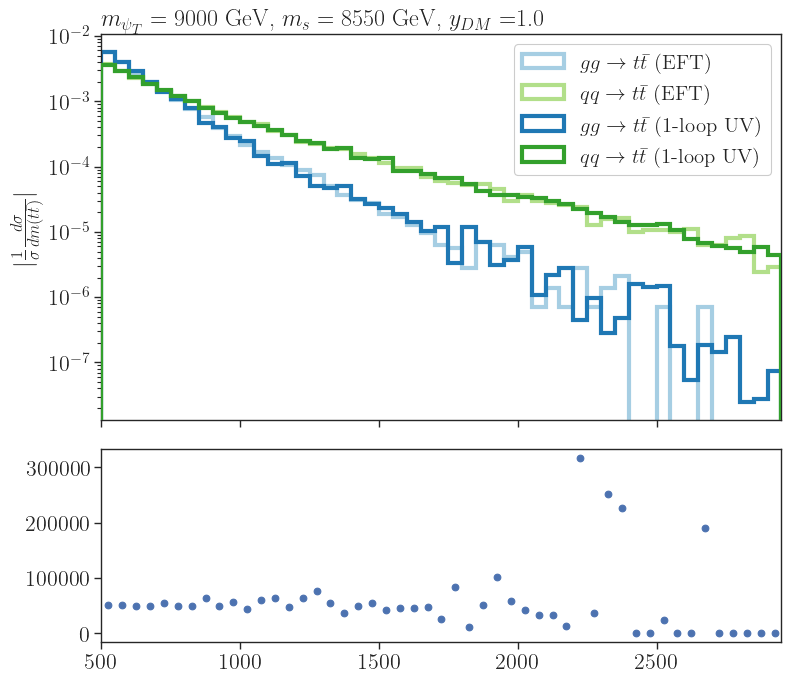

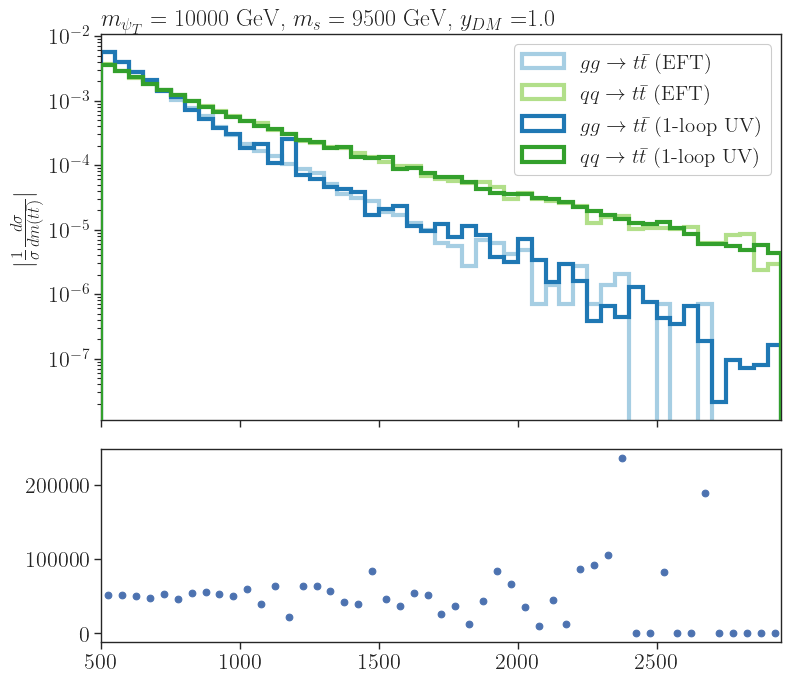

In [60]:
bins = np.arange(500.,3000.,50.)
# Define colors
yDM = 1.0

for i in range(0, len(data), 4):
    selected = data[i : i+4]
    
    _, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

    labels = []
    pmodels = []
    hists = []
    histsErr = []
    c = []
    mPsiT,mSDM = selected[0]['mass_params']
    bin_centers = (bins[:-1] + bins[1:]) / 2

    for i,d in enumerate(selected):
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
    
    for i,h in enumerate(hists):
        if 'SM' in labels[i]:
            continue       
        axarr[0].hist(bins[:-1],weights=np.abs(h),label=labels[i],bins=bins,
                          color=c[i],alpha=1.0,histtype='step',density=True,
                         linewidth=3,fill=False,zorder=i,linestyle='solid')
    axarr[1].scatter(bin_centers, np.divide(hists[0], hists[2]))
        
    axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
    axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                   loc='left')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
    axarr[0].set_xlim(bins.min(),bins.max())
    
plt.show()

['$y_{DM}^2$']
